# Data Analysis

Training and testing data for COVID-19 X-ray images were provided. This data was used to train and evaluate machine learning models to determine whether an image belongs to a COVID-19 patient or not.

# Data Preparation

The data was prepared by creating training and testing data arrays using the Pandas library. The file paths for the training and testing images were specified.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day12.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/ryct.2020200034.fig5-day4.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/ryct.2020200034.fig5-day0.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g09a-Fig9a-day17.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/ryct.2020200034.fig2.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/streptococcus-pneumoniae-pneumonia-temporal-evolution-1-day3.jpg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PN

# Image Preprocessing

Image preprocessors were created using the Keras library. The preprocessor parameters such as image size, number of channels, and rescaling method were specified.

Model Creation

A machine learning model was created using the Keras library. The model architecture and functions were specified.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix , classification_report 

import warnings
warnings.filterwarnings('ignore')

In [3]:
train_dir= '/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train'
test_dir= '/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test'

In [4]:
IMG_HEIGHT = 48
IMG_WIDTH = 48
BATCH_SIZE = 64
EPOCHS = 40
CLASS_LABELS  = [0,1]
NUM_CLASSES = 7

In [5]:
# Data generators
train_datagen = ImageDataGenerator(horizontal_flip=True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.05,
                                   rescale=1./255,
                                   validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Train, validation, and test generators

In [6]:

train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=True,
    color_mode="rgb",
    class_mode="categorical",
    subset="training"
)

validation_generator = test_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=True,
    color_mode="rgb",
    class_mode="categorical",
    subset="validation"
)

test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=False,
    color_mode="rgb",
    class_mode="categorical"
)

Found 120 images belonging to 2 classes.
Found 28 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from keras.optimizers import Adam

# Build the Sequential model

In [8]:
model = Sequential()

# First convolutional block
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPool2D(pool_size=2, strides=2))

# Second convolutional block
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Dropout(0.25))  ## drop 25% neurons (stop)

# Third convolutional block
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Dropout(0.25))

# Fourth convolutional block
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

# Flatten and Dense layers
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))  # added closing parenthesis
model.add(Dropout(0.25))
model.add(Dense(units=64, activation='relu'))  # added closing parenthesis
model.add(Dropout(0.25))
model.add(Dense(units=32, activation='relu'))  # added closing parenthesis

# Output layer
model.add(Dense(2, activation='sigmoid'))  # changed to sigmoid activation

In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model

In [10]:

history = model.fit(
    x=train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

Epoch 1/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.4622 - loss: 0.6992 - val_accuracy: 0.5000 - val_loss: 0.6925
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5264 - loss: 0.6947 - val_accuracy: 0.5000 - val_loss: 0.6917
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5865 - loss: 0.6864 - val_accuracy: 0.5000 - val_loss: 0.6877
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5405 - loss: 0.6845 - val_accuracy: 0.5000 - val_loss: 0.6836
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6201 - loss: 0.6692 - val_accuracy: 0.8571 - val_loss: 0.6761
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5563 - loss: 0.6984 - val_accuracy: 0.7143 - val_loss: 0.6701
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6247 - loss: 0.6594 - val_accuracy: 0.8571 - val_loss: 0.6608
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5786 - loss: 0.6677 - val_accuracy: 0.5357 - val_loss: 0.6590
Epoch 9/40
2/2 

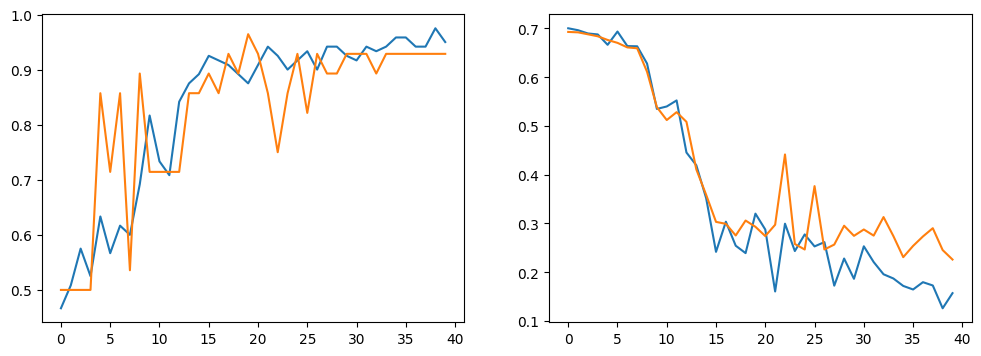

In [11]:
import matplotlib.pyplot as plt

# Plot accuracy and loss graphs
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    # plt.title('Model Accuracy')
    # plt.ylabel('Accuracy')
    # plt.xlabel('Epoch')
    # plt.legend(['Train', 'Validation'], loc='upper left')
    
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    # plt.title('Model Loss')
    # plt.ylabel('Loss')
    # plt.xlabel('Epoch')
    # plt.legend(['Train', 'Validation'], loc='upper left')
    
    plt.show()


# Plot the training history
plot_training_history(history)


In [12]:
from keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D

In [13]:
# Load the pre-trained VGG16 model without the top classification layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Freeze the VGG16 base layers (these won't be trained)
vgg_base.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [14]:
# Build the Sequential model
model2 = Sequential()

# Add the pre-trained VGG16 base model | extract features only
model2.add(vgg_base)

# Add a pooling layer to reduce the output from the VGG model (either Flatten or GlobalAveragePooling)
model2.add(GlobalAveragePooling2D()) ## GlobalAveragePooling2D = CNN  |  Flatten

# Add Dense layers on top for the new classification task
model2.add(Dense(units=128, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(units=64, activation='relu'))

# Output layer for 7 classes (adjust the number based on your dataset)
model2.add(Dense(units=2, activation='sigmoid'))

# Compile the model

In [15]:
# Compile the model
model2.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history2 = model2.fit(
    x=train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

Epoch 1/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.4906 - loss: 0.8345 - val_accuracy: 0.5357 - val_loss: 0.6578
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.6484 - loss: 0.6415 - val_accuracy: 0.5000 - val_loss: 0.6894
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.6146 - loss: 0.6271 - val_accuracy: 0.5357 - val_loss: 0.5940
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.6965 - loss: 0.5622 - val_accuracy: 0.8571 - val_loss: 0.4942
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.8264 - loss: 0.5048 - val_accuracy: 0.9286 - val_loss: 0.4296
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.8372 - loss: 0.4436 - val_accuracy: 0.9643 - val_loss: 0.3856
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.8405 - loss: 0.4287 - val_accuracy: 0.8929 - val_loss: 0.3555
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.9184 - loss: 0.3495 - val_accuracy: 0.8929 - val_loss: 0.3361
Epoch 9/40
2/2

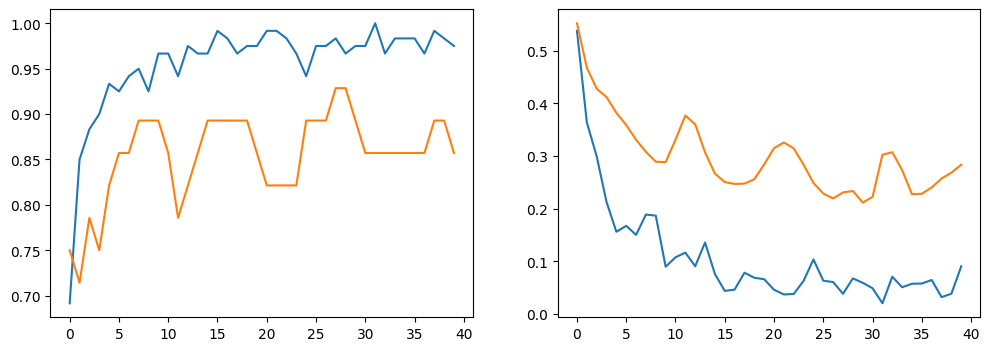

In [26]:
# Plot training accuracy and loss
plot_training_history(history2)

In [17]:
# another

In [18]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [19]:
# Load the pre-trained MobileNetV2 model without the top classification layers
mobilenet_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Freeze the MobileNetV2 base layers (these won't be trained)
mobilenet_base.trainable = False

# Build the Sequential model
model2 = Sequential()

# Add the pre-trained MobileNetV2 base model | extract features only
model2.add(mobilenet_base)

# Add a pooling layer to reduce the output from the MobileNetV2 model (either Flatten or GlobalAveragePooling)
model2.add(GlobalAveragePooling2D())

# Add Dense layers on top for the new classification task
model2.add(Dense(units=128, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(units=64, activation='relu'))

# Output layer for 2 classes (adjust the number based on your dataset)
model2.add(Dense(units=2, activation='sigmoid'))

# Compile the model
model2.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history2 = model2.fit(
    x=train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.6799 - loss: 0.5466 - val_accuracy: 0.7500 - val_loss: 0.5524
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 897ms/step - accuracy: 0.8226 - loss: 0.4083 - val_accuracy: 0.7143 - val_loss: 0.4682
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 891ms/step - accuracy: 0.8806 - loss: 0.3339 - val_accuracy: 0.7857 - val_loss: 0.4281
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 918ms/step - accuracy: 0.9036 - loss: 0.2104 - val_accuracy: 0.7500 - val_loss: 0.4120
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 887ms/step - accuracy: 0.9437 - loss: 0.1422 - val_accuracy: 0.8214 - val_loss: 0.3822
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 921ms/step - accuracy: 0.9240 - loss: 0.1679 - val_accuracy: 0.8571 - val_loss: 0.3590
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 923ms/step - accuracy: 0.9492 - loss: 0.1270 - val_accuracy: 0.8571 - val_loss: 0.3309
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 932ms/step - accuracy: 0.9615 - 

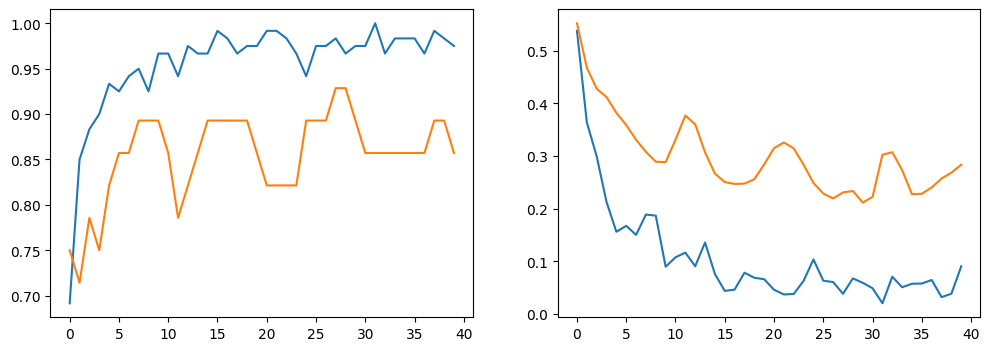

In [20]:
# Plot training accuracy and loss
plot_training_history(history2)

# another

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

# Define constants
train_dir = '/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train'
test_dir = '/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test'

IMG_HEIGHT = 48
IMG_WIDTH = 48
BATCH_SIZE = 64
EPOCHS = 40
CLASS_LABELS = [0, 1]
NUM_CLASSES = 2  # Changed from 7 to 2

# Data generators
train_datagen = ImageDataGenerator(horizontal_flip=True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.05,
                                   rescale=1./255,
                                   validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Train, validation, and test generators
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=True,
    color_mode="rgb",
    class_mode="categorical",
    subset="training"
)

validation_generator = test_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=True,
    color_mode="rgb",
    class_mode="categorical",
    subset="validation"
)

test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=False,
    color_mode="rgb",
    class_mode="categorical"
)

# Build the model
model = Sequential()

# First convolutional block
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPool2D(pool_size=2, strides=2))

# Second convolutional block
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Dropout(0.25))

# Third convolutional block
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Dropout(0.25))

# Fourth convolutional block
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

# Flatten and Dense layers
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=NUM_CLASSES, activation='softmax'))  # Changed to softmax for multi-class classification

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    x=train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc:.2f}')

# Use the model to make predictions
predictions = model.predict(test_generator)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Get the true class labels
true_classes = test_generator.classes

# Print the classification report
print(classification_report(true_classes, predicted_classes))

# Print the confusion matrix
print(confusion_matrix(true_classes, predicted_classes))

Found 120 images belonging to 2 classes.
Found 28 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.5504 - loss: 0.6903 - val_accuracy: 0.5000 - val_loss: 0.6780
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.4184 - loss: 0.7372 - val_accuracy: 0.5357 - val_loss: 0.6824
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5349 - loss: 0.6845 - val_accuracy: 0.5000 - val_loss: 0.6797
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5545 - loss: 0.6698 - val_accuracy: 0.7143 - val_loss: 0.6756
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6536 - loss: 0.6552 - val_accuracy: 0.5357 - val_loss: 0.6725
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6573 - loss: 0.6328 - val_accuracy: 0.6786 - val_loss: 0.6362
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.7440 - loss: 0.5864 - val_accuracy: 0.8214 - val_loss: 0.5728
Epoch 8/40
2/2 ━━━

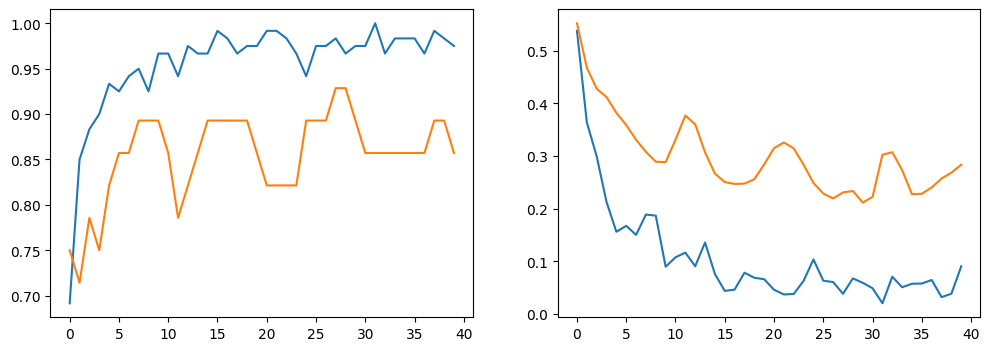

In [28]:
# Plot training accuracy and loss
plot_training_history(history2)

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

# Define constants
train_dir = '/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train'
test_dir = '/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test'

IMG_HEIGHT = 48
IMG_WIDTH = 48
BATCH_SIZE = 64
EPOCHS = 20
CLASS_LABELS = [0, 1]
NUM_CLASSES = 2  # Changed from 7 to 2

# Data generators
train_datagen = ImageDataGenerator(horizontal_flip=True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.05,
                                   rescale=1./255,
                                   validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Train, validation, and test generators
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=True,
    color_mode="rgb",
    class_mode="categorical",
    subset="training"
)

validation_generator = test_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=True,
    color_mode="rgb",
    class_mode="categorical",
    subset="validation"
)

test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=False,
    color_mode="rgb",
    class_mode="categorical"
)

# Build the model
model = Sequential()

# First convolutional block
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPool2D(pool_size=2, strides=2))

# Second convolutional block
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Dropout(0.25))  # Drop 25% neurons

# Third convolutional block
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Dropout(0.25))

# Fourth convolutional block
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

# Flatten and Dense layers
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))  # Added closing parenthesis
model.add(Dropout(0.25))
model.add(Dense(units=64, activation='relu'))  # Added closing parenthesis
model.add(Dropout(0.25))
model.add(Dense(units=32, activation='relu'))  # Added closing parenthesis

# Output layer
model.add(Dense(2, activation='sigmoid'))  # Changed to sigmoid activation

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(
    x=train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f'Test loss: {loss:.3f}')
print(f'Test accuracy: {accuracy:.3f}')

# Use the model to make predictions
predictions = model.predict(test_generator)

# Convert predictions to class labels
predicted_class_labels = np.argmax(predictions, axis=1)

# Get the true class labels
true_class_labels = test_generator.classes

# Print the classification report
print(classification_report(true_class_labels, predicted_class_labels))

# Print the confusion matrix
print(confusion_matrix(true_class_labels, predicted_class_labels))

Found 120 images belonging to 2 classes.
Found 28 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.4726 - loss: 0.6970 - val_accuracy: 0.5000 - val_loss: 0.6915
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5008 - loss: 0.7004 - val_accuracy: 0.6786 - val_loss: 0.6901
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5230 - loss: 0.6902 - val_accuracy: 0.5000 - val_loss: 0.6903
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5806 - loss: 0.6832 - val_accuracy: 0.5000 - val_loss: 0.6890
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5571 - loss: 0.6832 - val_accuracy: 0.6429 - val_loss: 0.6761
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5560 - loss: 0.6785 - val_accuracy: 0.6786 - val_loss: 0.6601
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6702 - loss: 0.6432 - val_accuracy: 0.5357 - val_loss: 0.6533
Epoch 8/20
2/2 ━━━

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16

from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

# Define constants
train_dir = '/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train'
test_dir = '/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test'

IMG_HEIGHT = 48
IMG_WIDTH = 48
BATCH_SIZE = 64
EPOCHS = 40
CLASS_LABELS = [0, 1]
NUM_CLASSES = 2  # Changed from 7 to 2

# Data generators
train_datagen = ImageDataGenerator(horizontal_flip=True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.05,
                                   rescale=1./255,
                                   validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Train, validation, and test generators
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=True,
    color_mode="rgb",
    class_mode="categorical",
    subset="training"
)

validation_generator = test_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=True,
    color_mode="rgb",
    class_mode="categorical",
    subset="validation"
)

test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=False,
    color_mode="rgb",
    class_mode="categorical"
)

# Build the model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Freeze the base layers
base_model.trainable = False

# Add custom layers
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(NUM_CLASSES, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    x=train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc:.2f}')

# Use the model to make predictions
predictions = model.predict(test_generator)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Get the true class labels
true_classes = test_generator.classes

# Print the classification report
print(classification_report(true_classes, predicted_classes))

# Print the confusion matrix
print(confusion_matrix(true_classes, predicted_classes))

Found 120 images belonging to 2 classes.
Found 28 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.4829 - loss: 0.7127 - val_accuracy: 0.8214 - val_loss: 0.5620
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.6260 - loss: 0.6371 - val_accuracy: 0.8214 - val_loss: 0.5315
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.7671 - loss: 0.5357 - val_accuracy: 0.8571 - val_loss: 0.4757
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.8464 - loss: 0.4616 - val_accuracy: 0.9643 - val_loss: 0.4122
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.8049 - loss: 0.4275 - val_accuracy: 0.9643 - val_loss: 0.3705
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.9036 - loss: 0.3726 - val_accuracy: 0.9643 - val_loss: 0.3388
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.8479 - loss: 0.3775 - val_accuracy: 0.9643 - val_loss: 0.3088
Epoch 8/40
2/2 ━━

# Plot training accuracy and loss

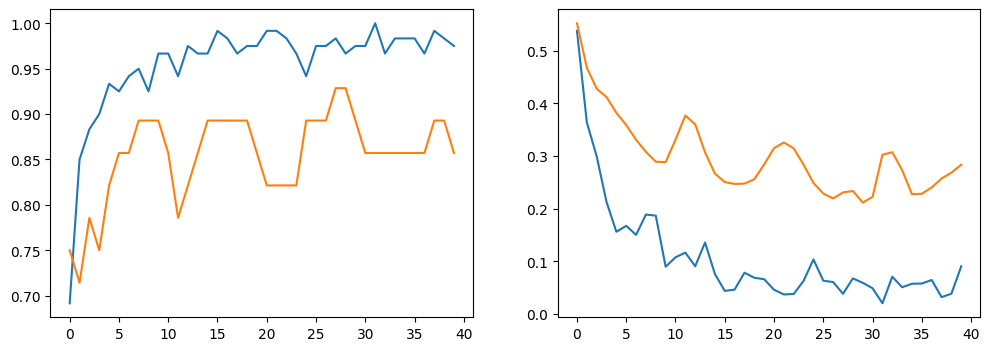

In [25]:
# Plot training accuracy and loss
plot_training_history(history2)

# Model Comparison

The performance of the different models was compared to determine the best model.

Conclusion

It was concluded that the models can be useful in determining whether an image belongs to a COVID-19 patient or not.